In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('Asteroid_Updated.csv')
data.head()

C:\Users\ray\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [4]:
# look how many rows and features in the dataset
data.shape

(839714, 31)

In [5]:
data.isnull().sum()

name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

In [6]:
# features to do clustering
df = data[["q","ad"]]
df

,q,ad
0,2.558684,2.979647
1,2.133865,3.411067
2,1.983332,3.354967
3,2.151909,2.570926
4,2.082324,3.066174
...,...,...
839709,0.943214,4.682676
839710,1.959126,3.331350
839711,1.893638,2.852636
839712,1.676433,2.844376


In [7]:
# drop the rows that have missing value
df = df.dropna()
df

,q,ad
0,2.558684,2.979647
1,2.133865,3.411067
2,1.983332,3.354967
3,2.151909,2.570926
4,2.082324,3.066174
...,...,...
839709,0.943214,4.682676
839710,1.959126,3.331350
839711,1.893638,2.852636
839712,1.676433,2.844376


In [11]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

,q,ad
0,0.651481,0.758665
1,0.530347,0.847781
2,0.508891,0.860831
3,0.641850,0.766830
4,0.561817,0.827262


In [12]:
import torch
from kmeans_pytorch import kmeans, kmeans_predict

In [14]:
X = data_scaled.iloc[:, :].values
X

array([[0.65148107, 0.75866489],
       [0.53034707, 0.84778062],
       [0.50889125, 0.86083082],
       ...,
       [0.55305743, 0.83314313],
       [0.50775589, 0.86150099],
       [0.48406046, 0.87503455]])

In [15]:
# data
data_size, dims, num_clusters = X, 2, 3
x = torch.from_numpy(X)

In [16]:
x

tensor([[0.6515, 0.7587],
        [0.5303, 0.8478],
        [0.5089, 0.8608],
        ...,
        [0.5531, 0.8331],
        [0.5078, 0.8615],
        [0.4841, 0.8750]], dtype=torch.float64)

In [17]:
# k-means
cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters=num_clusters, distance='euclidean'
)

[running kmeans]: 0it [00:00, ?it/s]

running k-means on cpu..


[running kmeans]: 8it [00:02,  3.15it/s, center_shift=0.000094, iteration=8, tol=0.000100]


In [18]:
# cluster IDs and cluster centers
print(cluster_ids_x)
print(cluster_centers)

tensor([2, 1, 1,  ..., 1, 1, 0])
tensor([[0.4107, 0.9065],
        [0.5622, 0.8264],
        [0.6449, 0.7636]])


In [19]:
# more data
y = np.random.randn(3, dims) / 6
y_kmeans = torch.from_numpy(y)

In [20]:
# predict cluster ids for y
cluster_ids_y = kmeans_predict(
    y_kmeans, cluster_centers, 'euclidean'
)

predicting on cpu..


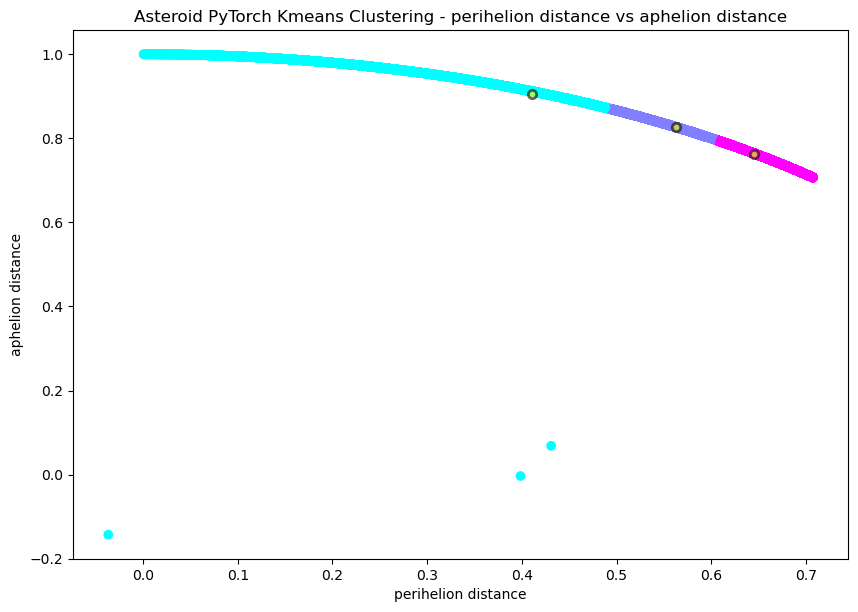

In [21]:
# plot
plt.figure(figsize=(10, 7), dpi=100)
plt.scatter(x[:, 0], x[:, 1], c=cluster_ids_x, cmap='cool')
plt.scatter(y[:, 0], y[:, 1], c=cluster_ids_y, cmap='cool')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='yellow', 
            alpha=0.6, edgecolors='black', linewidths=2)
plt.title('Asteroid PyTorch Kmeans Clustering - perihelion distance vs aphelion distance')
plt.xlabel('perihelion distance')
plt.ylabel('aphelion distance')
plt.show()